In [216]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import pca
import seaborn as sns

## Load and clean data

In [368]:
base_path = "data/2021/deutschland"

# Load the list of parties
with open(f"{base_path}/party.json", "rt") as fl:
    parties = json.load(fl)
    
party_map = pd.DataFrame(parties).set_index("id")["name"].to_dict()

# Load the questions
with open(f"{base_path}/statement.json", "rt") as fl:
    statements = json.load(fl)
statement_df = pd.DataFrame(statements)

# Load the answers
with open(f"{base_path}/opinion.json", "rt") as fl:
    data = json.load(fl)
    
# Clean answer data    
df = pd.DataFrame(data)
df["party"] = df["party"].map(party_map)
df["answer"] = df["answer"].map({0: 1, 1: -1, 2: 0})
by_party = df.pivot(index="statement", columns="party", values="answer")

## Correlation

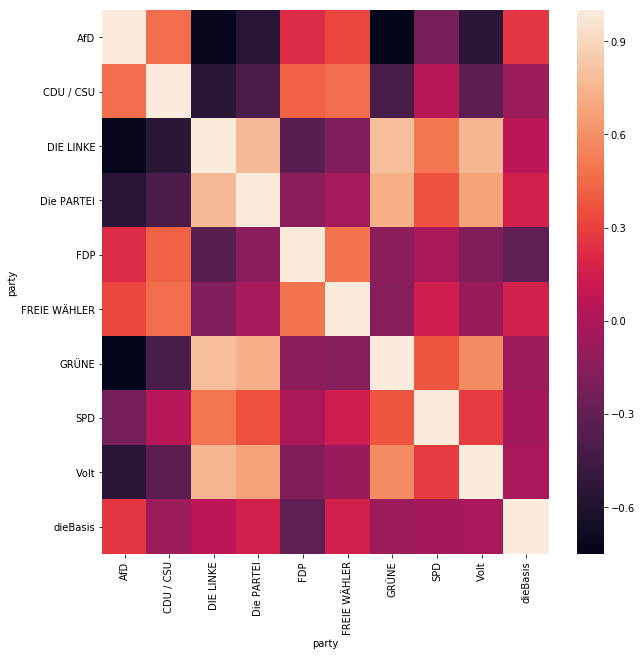

In [367]:
selected = ["AfD", "CDU / CSU", "DIE LINKE",'Die PARTEI', 'FDP', 'FREIE WÄHLER', 'GRÜNE','SPD', 'Volt', 'dieBasis']
plt.figure(figsize=(10, 10))
sns.heatmap(by_party.corr().loc[selected, selected])
plt.savefig("correlation.png")

## PCA

In [339]:
decomposer = pca.PCA(n_components=2)
by_party_filtered = by_party

transformed_by_party = decomposer.fit_transform(by_party_filtered.T)
transformed_by_party = pd.DataFrame(transformed_by_party, index=by_party_filtered.columns)

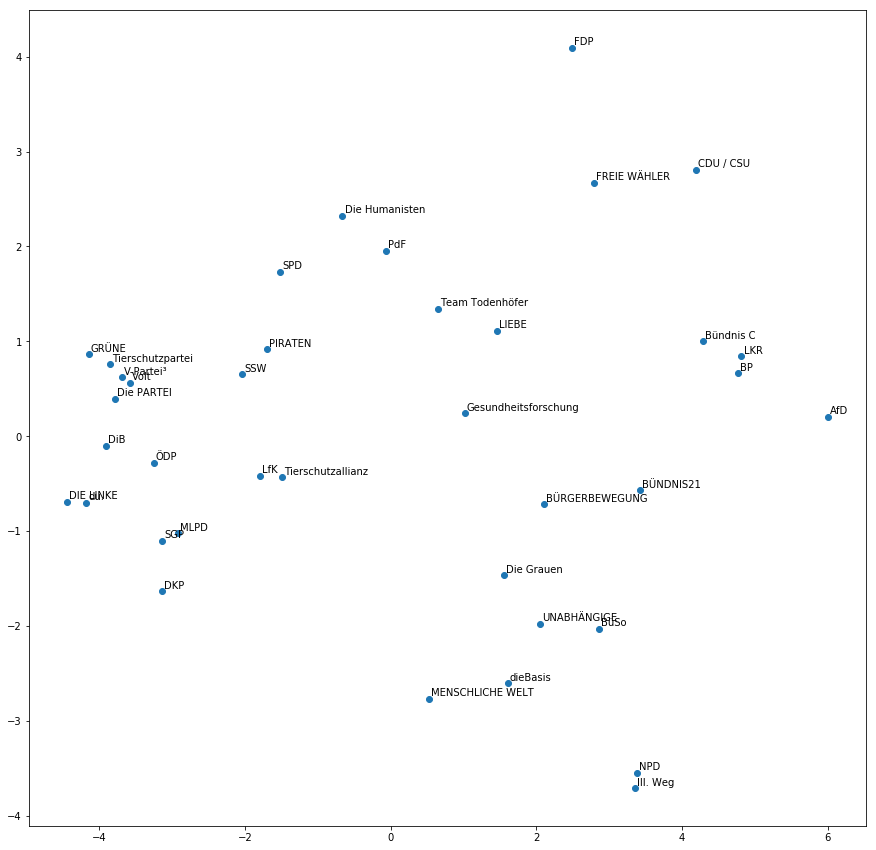

In [354]:
plt.figure(figsize=(15, 15))
plt.scatter(transformed_by_party[0], transformed_by_party[1])
for (x, y, s) in zip(transformed_by_party[0], transformed_by_party[1], transformed_by_party.index):
    plt.text(x=x + 0.03, y=y + 0.03, s=s)
plt.savefig("scatterplot.png")

## Explore PCA factors

In [344]:
pd.set_option('display.max_colwidth', 200)

In [347]:
components = pd.DataFrame(decomposer.components_, columns=by_party_filtered.index)

In [359]:
factor_x = components.T[0].sort_values().reset_index()
factor_x = factor_x.rename(columns={"statement": "id", 0: "weight"}).merge(statement_df[["id", "label", "text"]], on="id", how="left")
factor_x

,id,weight,label,text
0,2,-0.254426,Wählen ab 16,Bei Bundestagswahlen sollen auch Jugendliche ab 16 Jahren wählen dürfen.
1,13,-0.227045,Doppelte Staatsbürgerschaft,"In Deutschland soll es generell möglich sein, neben der deutschen eine zweite Staatsbürgerschaft zu haben."
2,6,-0.225187,Ausstieg aus der Kohleverstromung,Der für das Jahr 2038 geplante Ausstieg aus der Kohleverstromung soll vorgezogen werden.
3,0,-0.216464,Tempolimit auf Autobahnen,Auf allen Autobahnen soll ein generelles Tempolimit gelten.
4,14,-0.206476,Sprachliche Berücksichtigung von Geschlechtsidentitäten,Bundesbehörden sollen in ihren Veröffentlichungen unterschiedliche Geschlechtsidentitäten sprachlich berücksichtigen.
5,31,-0.201016,Islamische Verbände,Islamische Verbände sollen als Religionsgemeinschaften staatlich anerkannt werden können.
6,4,-0.185083,Begrenzung für Mieterhöhungen,"Die Möglichkeiten der Vermieterinnen und Vermieter, Wohnungsmieten zu erhöhen, sollen gesetzlich stärker begrenzt werden."
7,23,-0.175686,Verkauf von Cannabis,Der kontrollierte Verkauf von Cannabis soll generell erlaubt sein.
8,17,-0.175040,Kopftuch im Dienst,Das Tragen eines Kopftuchs soll Beamtinnen im Dienst generell erlaubt sein.
9,30,-0.172253,Ökologische Landwirtschaft,Ökologische Landwirtschaft soll stärker gefördert werden als konventionelle Landwirtschaft.


In [350]:
factor_y = components.T[1].sort_values().reset_index()
factor_y.rename(columns={"statement": "id"}).merge(statement_df[["id", "label", "text"]], on="id", how="left")

,id,1,label,text
0,10,-0.254355,Traditionelle Familie,"Die traditionelle Familie aus Vater, Mutter und Kindern soll stärker als andere Lebensgemeinschaften gefördert werden."
1,24,-0.248778,Austritt aus der EU,Deutschland soll aus der Europäischen Union austreten.
2,35,-0.219121,Erhöhung des Mindestlohns,Der gesetzliche Mindestlohn soll spätestens im Jahr 2022 auf mindestens 12 Euro erhöht werden.
3,27,-0.218273,Steuer auf hohe Vermögen,Auf hohe Vermögen soll wieder eine Steuer erhoben werden.
4,7,-0.216807,Gesetzliche Rentenversicherung,Alle Erwerbstätigen sollen in der gesetzlichen Rentenversicherung versichert sein müssen.
5,4,-0.202377,Begrenzung für Mieterhöhungen,"Die Möglichkeiten der Vermieterinnen und Vermieter, Wohnungsmieten zu erhöhen, sollen gesetzlich stärker begrenzt werden."
6,3,-0.201631,Windenergie,Die Förderung von Windenergie soll beendet werden.
7,30,-0.169475,Ökologische Landwirtschaft,Ökologische Landwirtschaft soll stärker gefördert werden als konventionelle Landwirtschaft.
8,9,-0.141061,Steuer auf digitale Dienstleistungen,"Auf den Umsatz, der in Deutschland mit digitalen Dienstleistungen erzielt wird, soll eine nationale Steuer erhoben werden."
9,8,-0.117477,Abschaffung des Familiennachzugs,Das Recht anerkannter Flüchtlinge auf Familiennachzug soll abgeschafft werden.
